In [1]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from jax import grad, jit
import jax.numpy as jnp

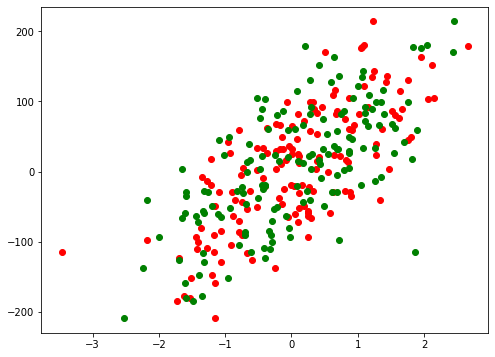

In [2]:
X,y= make_regression(n_samples = 150, n_features=  2, noise = 5) #Data generation
y=y.reshape((y.shape[0],1))
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15) #Splitting data
fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], y, c='r')
plt.scatter(X[:,1], y, c='g')
plt.show()

In [3]:
def loss(w,b,X,y):
  pred = X.dot(w)+ b
  return ((pred-y)**2).mean()

In [4]:
Weights = jnp.zeros((X_train.shape[1],1))
bias = 0.
l_rate = 0.001
n_iter = 3000

In [5]:
gradW = jit(grad(loss, argnums=0))
gradb = jit(grad(loss,argnums=1))

In [6]:
for _ in range(n_iter):
  dW = gradW(Weights,bias,X_train,y_train)
  db = gradb(Weights,bias,X_train,y_train)
  print(loss(Weights,bias,X_train,y_train))
  Weights -= dW*l_rate
  bias-= db*l_rate

7545.726802655773
7513.57
7481.55
7449.6685
7417.924
7386.315
7354.8433
7323.5054
7292.3037
7261.2363
7230.301
7199.4995
7168.83
7138.2925
7107.886
7077.6113
7047.466
7017.449
6987.563
6957.8047
6928.1743
6898.672
6869.2944
6840.0444
6810.919
6781.9204
6753.0454
6724.295
6695.668
6667.1646
6638.7827
6610.522
6582.3843
6554.3667
6526.4707
6498.6924
6471.0347
6443.4946
6416.074
6388.771
6361.5854
6334.516
6307.5635
6280.726
6254.005
6227.3975
6200.9053
6174.5254
6148.26
6122.107
6096.067
6070.138
6044.321
6018.614
5993.0176
5967.5317
5942.1543
5916.886
5891.728
5866.676
5841.7324
5816.8945
5792.164
5767.54
5743.022
5718.6094
5694.301
5670.097
5645.996
5621.9995
5598.106
5574.3145
5550.626
5527.038
5503.552
5480.1665
5456.8804
5433.696
5410.61
5387.623
5364.7363
5341.946
5319.2544
5296.659
5274.1616
5251.7603
5229.4546
5207.2446
5185.131
5163.1123
5141.187
5119.3555
5097.6187
5075.9746
5054.4233
5032.9644
5011.5986
4990.3237
4969.139
4948.047
4927.0435
4906.1323
4885.3086
4864.5757
4843.9

In [7]:
loss(Weights, bias, X_test, y_test) #Model's Loss on test set

DeviceArray(18.755125, dtype=float32)

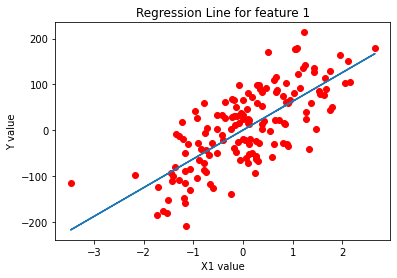

In [8]:
fig, ax = plt.subplots()
ax.set_title("Regression Line for feature 1")
ax.set_xlabel("X1 value")
ax.set_ylabel("Y value")
plt.scatter(X[:,0], y, c='r')
plt.plot(X[:,0], X[:,0]*Weights[0]+bias)
plt.show()

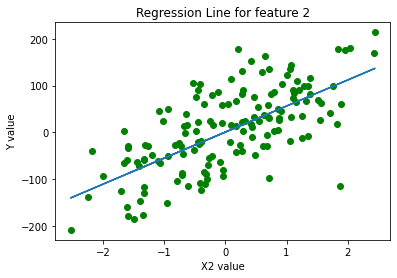

In [9]:
fig, ax = plt.subplots()
ax.set_title("Regression Line for feature 2")
ax.set_xlabel("X2 value")
ax.set_ylabel("Y value")
plt.scatter(X[:,1], y, c='g')
plt.plot(X[:,1], X[:,1]*Weights[1]+bias)
plt.show()